## Задача 1

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import mpl_toolkits.mplot3d

df=pd.read_csv("kc-house-data.csv")
df



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Задача 1.2 
Изучите стоимости недвижимости

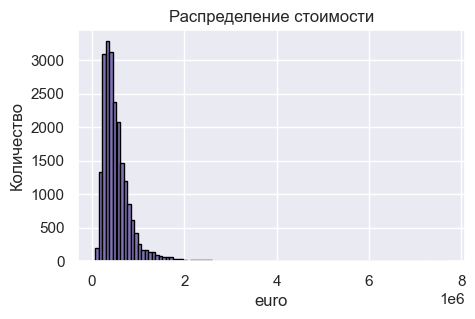

In [77]:
plt.figure(figsize=(5, 3))
plt.hist(df['price'], color='m', edgecolor='black',bins = 100)
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('Количество');

Вывод: из графического распределения видно, что набольшое количество домов стоит около 500 тысяч у.е.

### Задача 1.3
 Изучите распределение квадратуры жилой

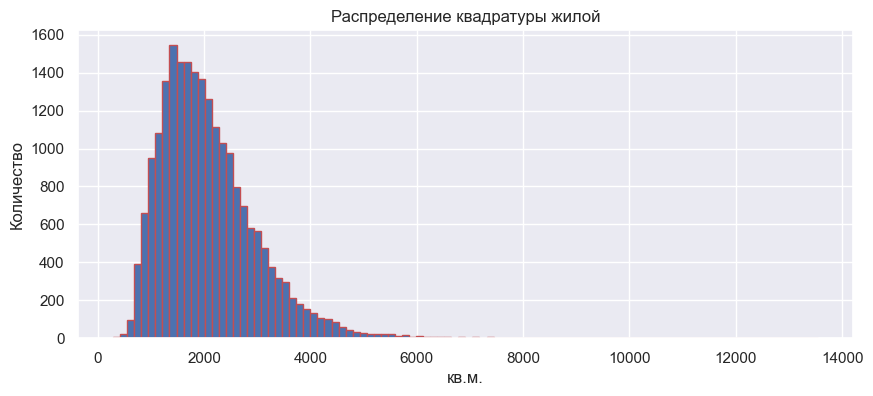

In [78]:
plt.figure(figsize=(10, 4))
plt.hist(df['sqft_living'], color='b', edgecolor='r',bins = 100)
plt.title('Распределение квадратуры жилой')
plt.xlabel('кв.м.')
plt.ylabel('Количество');

Вывод: квартиры с жилой площадью от 1500 до 2000 кв.м. присутствуют в данных в большем количестве

### Задача 1.4 
Изучите распределение года постройки

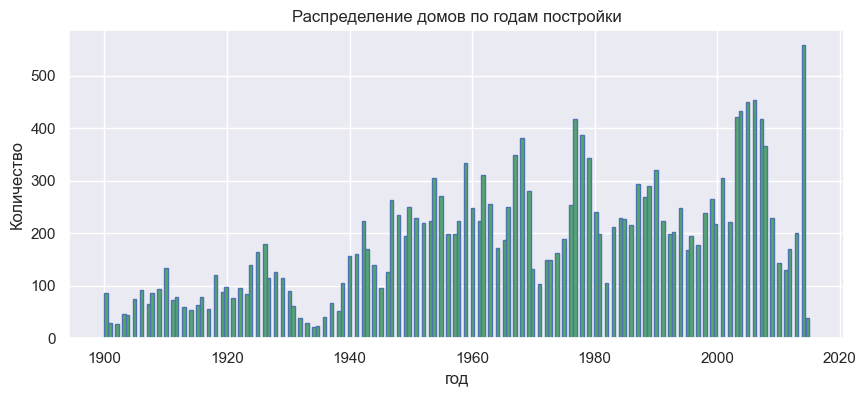

In [79]:
plt.figure(figsize=(10, 4))
plt.hist(df['yr_built'], color='g', edgecolor='b',bins = 200)
plt.title('Распределение домов по годам постройки')
plt.xlabel('год')
plt.ylabel('Количество');

Вывод: из графического распределения видно, что рост и спад строительства домой на прямую был связан с экономической ситуацией в стране, так стабильный рост строительства был в после военные годы,или просадка по строительству была после глобального кризиса 2008 года

## Задача 2
### Задача 2.1 
Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы


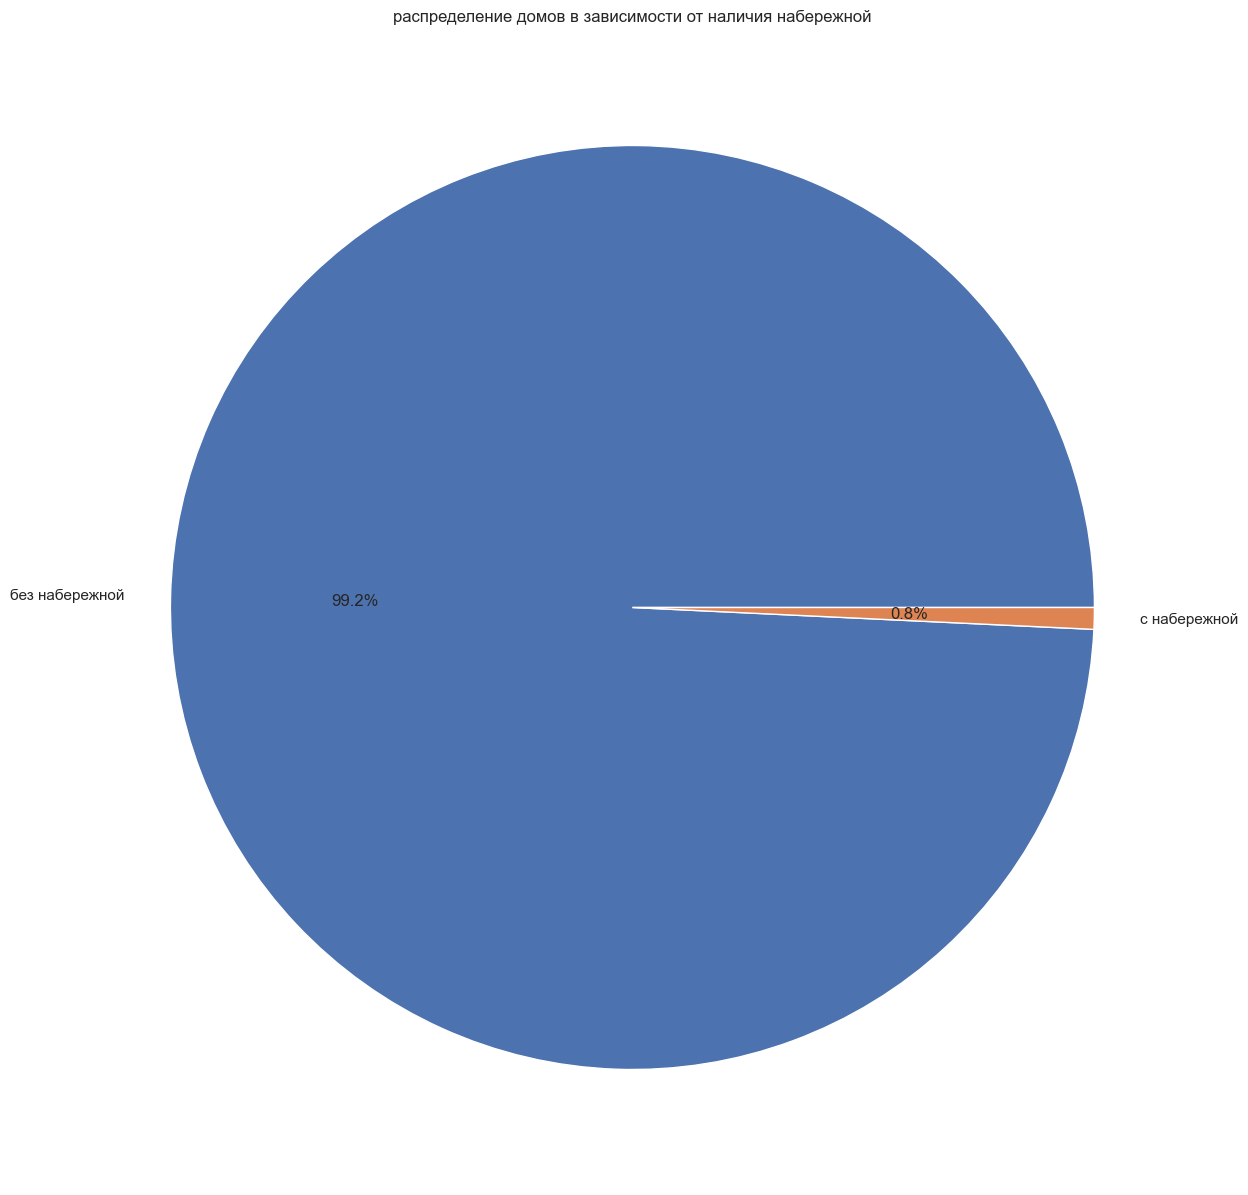

In [80]:
data = df["waterfront"].apply(lambda x: "без набережной" if x==0 else "c набережной")
data = data.value_counts()
data

names = data.index
values = data.values
plt.title('распределение домов в зависимости от наличия набережной')
plt.pie(values, autopct='%.1f%%', labels=names);

Вывод: из круговой диаграммы видно,что доля домой с видом на набережную составляет 0.8% от общего количества домов

### Задача 2.2 
Изучите распределение этажей домов

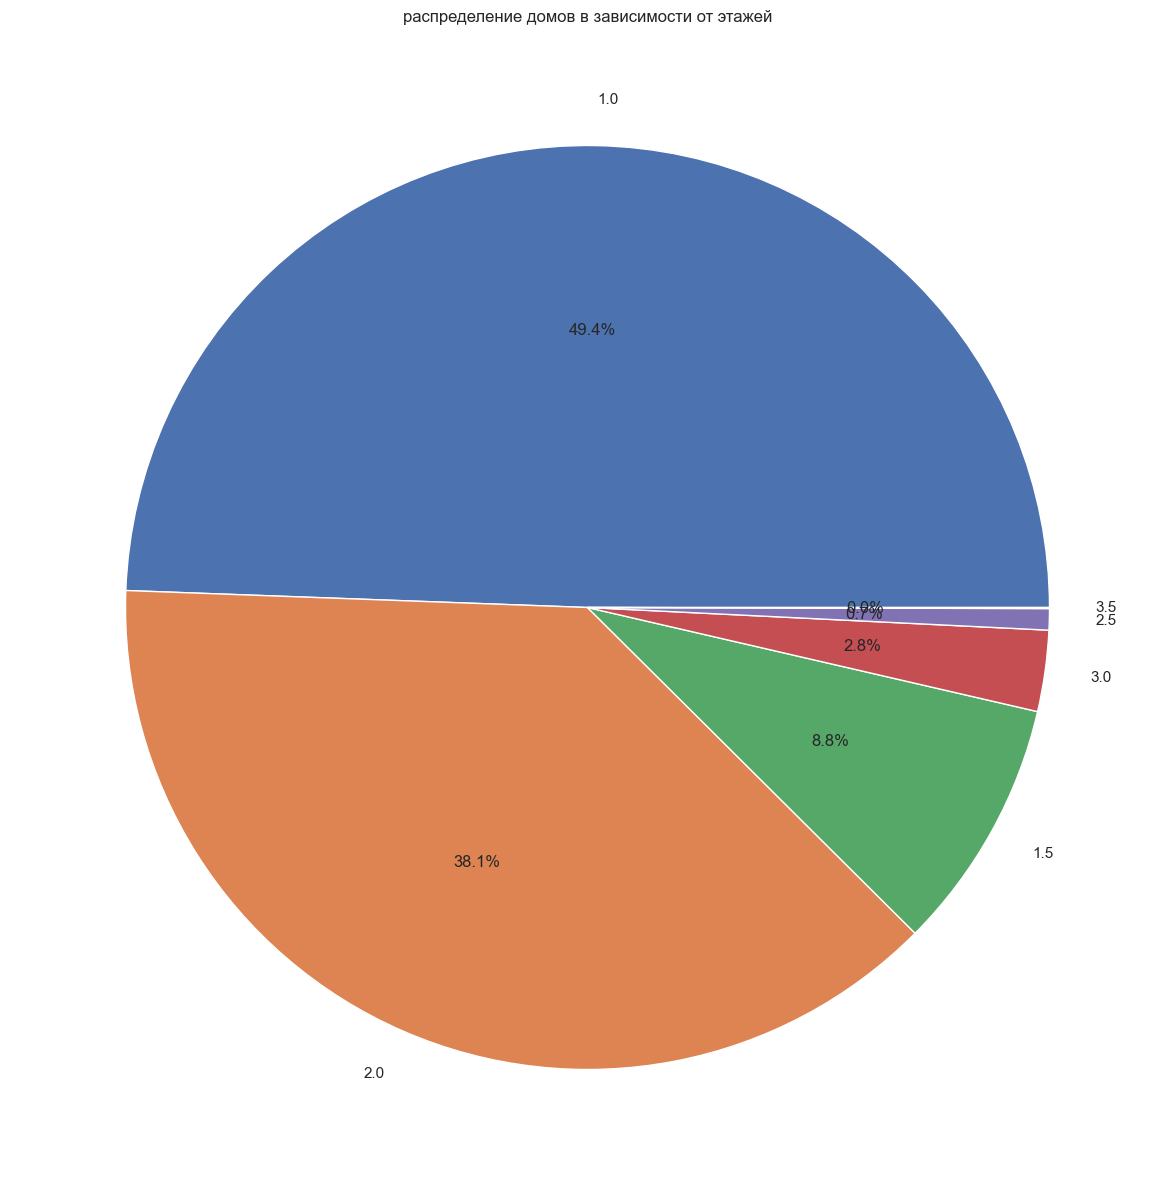

In [81]:
data = df["floors"]
data = data.value_counts()
data
names = data.index
values = data.values
plt.title('распределение домов в зависимости от этажей')
plt.pie(values, autopct='%.1f%%', labels=names);

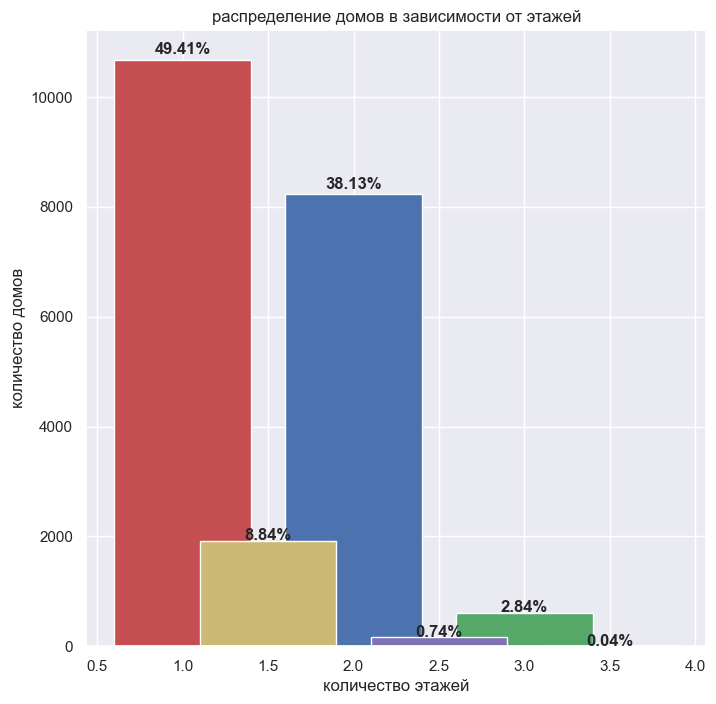

In [82]:
all_home=df["floors"].value_counts().sum()
data = df["floors"].value_counts()
percentage = []
for i in range(data.shape[0]):
    pct = (data.values[i] / all_home) * 100
    percentage.append(round(pct,2))
plt.figure(figsize=(8,8))
graph=plt.bar(data.index,data.values, color = ["r","b","y","g","m","r"])
plt.title('распределение домов в зависимости от этажей')
plt.xlabel("количество этажей")
plt.ylabel("количество домов")
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

изучив график можно сделать вывод, что большую долю на рынке занимают одноэтажные дома, минимальное количество домов в продаже 2,5 и 3,5 этажные

### Задача 2.2
 Изучите распределение состояния домов

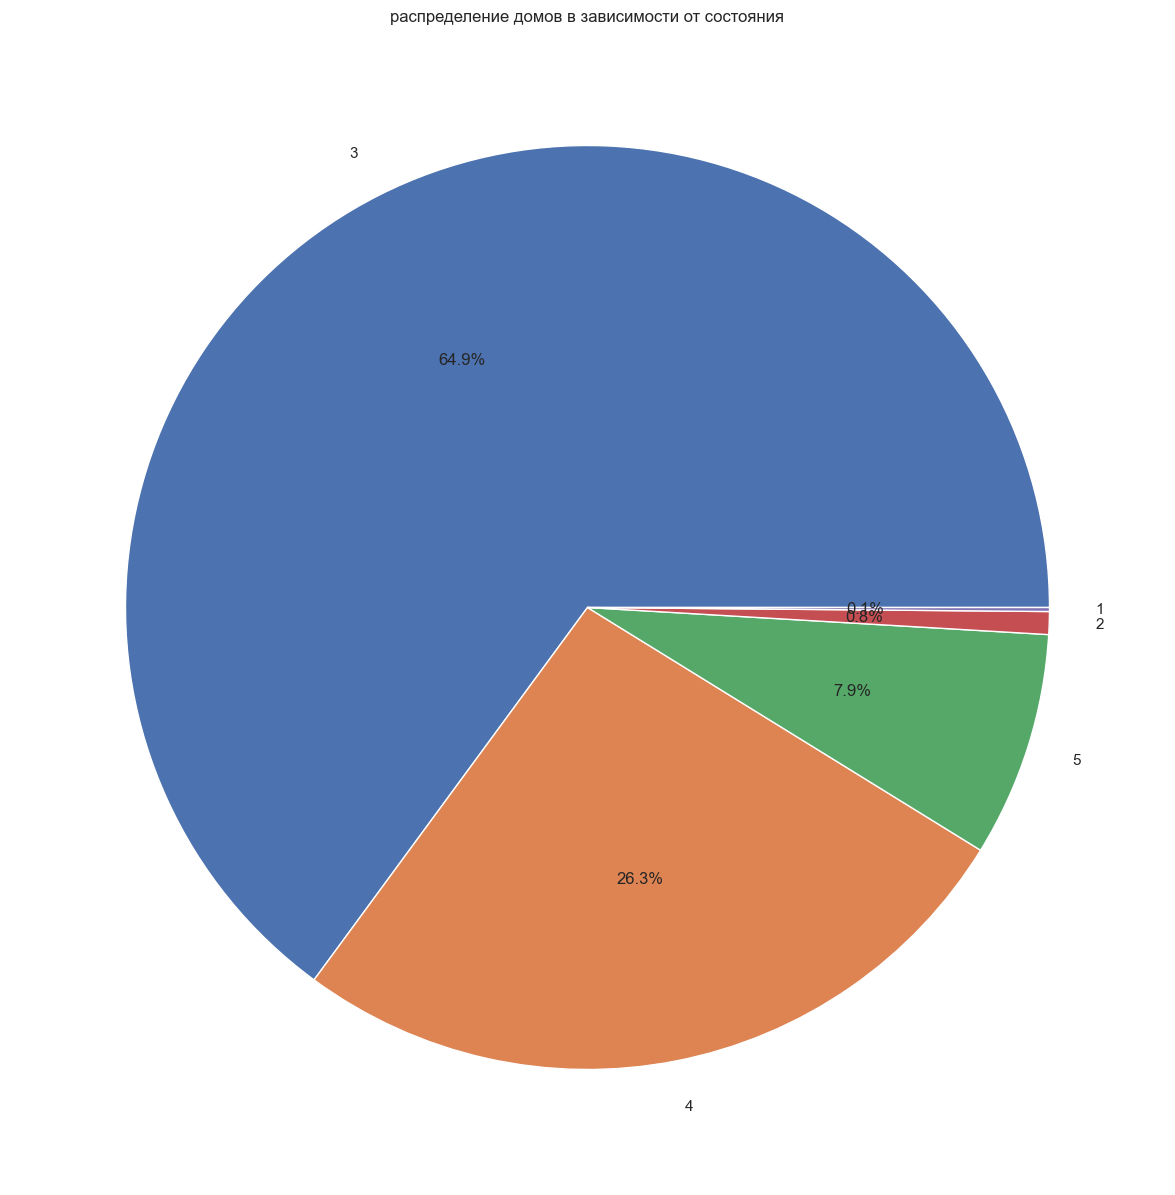

In [83]:
data=df["condition"].value_counts()
names = data.index
values = data.values
plt.title('распределение домов в зависимости от состояния')
plt.pie(values, autopct='%.1f%%', labels=names);

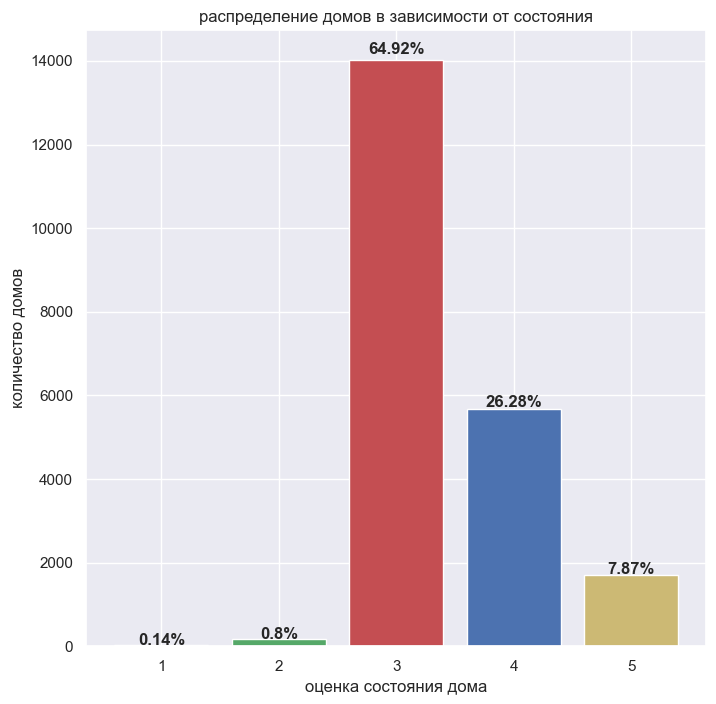

In [84]:
all_home=df["condition"].value_counts().sum()
data = df["condition"].value_counts()
percentage = []
for i in range(data.shape[0]):
    pct = (data.values[i] / all_home) * 100
    percentage.append(round(pct,2))
plt.figure(figsize=(8,8))
graph=plt.bar(data.index,data.values, color = ["r","b","y","g","m","r"])
plt.title('распределение домов в зависимости от состояния')
plt.xlabel("оценка состояния дома")
plt.ylabel("количество домов")
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

Из графика следует, что большая часть(65%) домов имеет оценку (3), a доля домов с плохими оценками (1и2) не превышает 1%

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [85]:
df=pd.read_csv("kc-house-data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


&nbsp; Для поиска линейных зависимостей стоимости недвижимости и ее характеристик воспользуемся функцией корреляции 

In [86]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.00,0.00,0.00,0.00,-0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.14
price,0.00,1.00,0.31,0.53,0.70,0.00,0.26,0.27,0.40,0.00,0.67,0.61,0.32,0.00,0.13,0.00,0.31,0.00,0.59,0.00
bedrooms,0.00,0.31,1.00,0.52,0.58,0.00,0.18,0.00,0.00,0.00,0.36,0.48,0.30,0.15,0.00,-0.15,0.00,0.13,0.39,0.00
bathrooms,0.00,0.53,0.52,1.00,0.75,0.00,0.50,0.00,0.19,-0.12,0.66,0.69,0.28,0.51,0.00,-0.20,0.00,0.22,0.57,0.00
sqft_living,0.00,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,0.00,0.76,0.88,0.44,0.32,0.00,-0.20,0.00,0.24,0.76,0.18
sqft_lot,-0.13,0.00,0.00,0.00,0.17,1.00,0.00,0.00,0.00,0.00,0.11,0.18,0.00,0.00,0.00,-0.13,0.00,0.23,0.14,0.72
floors,0.00,0.26,0.18,0.50,0.35,0.00,1.00,0.00,0.00,-0.26,0.46,0.52,-0.25,0.49,0.00,0.00,0.00,0.13,0.28,0.00
waterfront,0.00,0.27,0.00,0.00,0.10,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.00,0.40,0.00,0.19,0.28,0.00,0.00,0.40,1.00,0.00,0.25,0.17,0.28,0.00,0.10,0.00,0.00,0.00,0.28,0.00
condition,0.00,0.00,0.00,-0.12,0.00,0.00,-0.26,0.00,0.00,1.00,-0.14,-0.16,0.17,-0.36,0.00,0.00,0.00,-0.11,0.00,0.00


для более удобного визуального поиска воспользуемся тепловой картой для нашей корреляционной таблицы

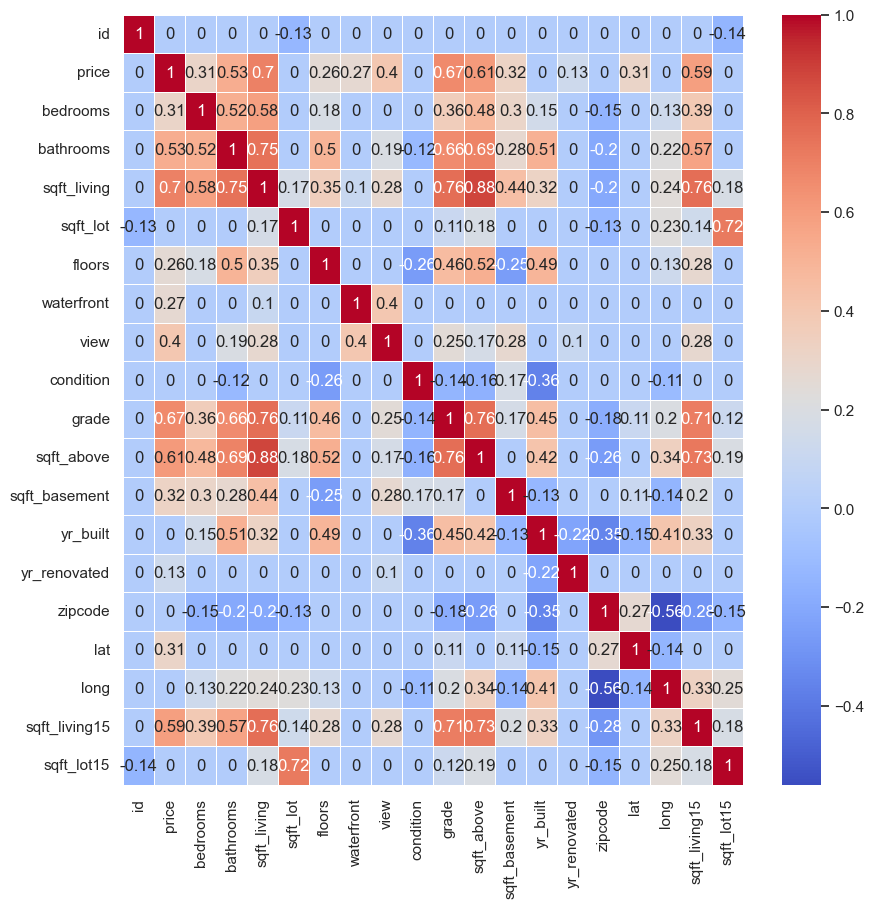

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Изучив тепловую карту таблицы, можно сделать вывод, что цена в большинстве случаев имеет прямую линейную зависимость. Выделим основные ярко выраженные зависимости: жилая площадь, общая оценка дома, площадь без подвала, количество ванных комнат, оценка вида, площадь подвала,количество спален, наличие набережной.

Так как площадь явный фактор, который влияет на конечную стоимость, то его можно убрать из списка, а также его производные(площадь без подвала и площадь подвала).

Ниже рассмотрим такие факторы как: оценка дома,количество ванных, оценка вида, количество спален и наличие набережной.

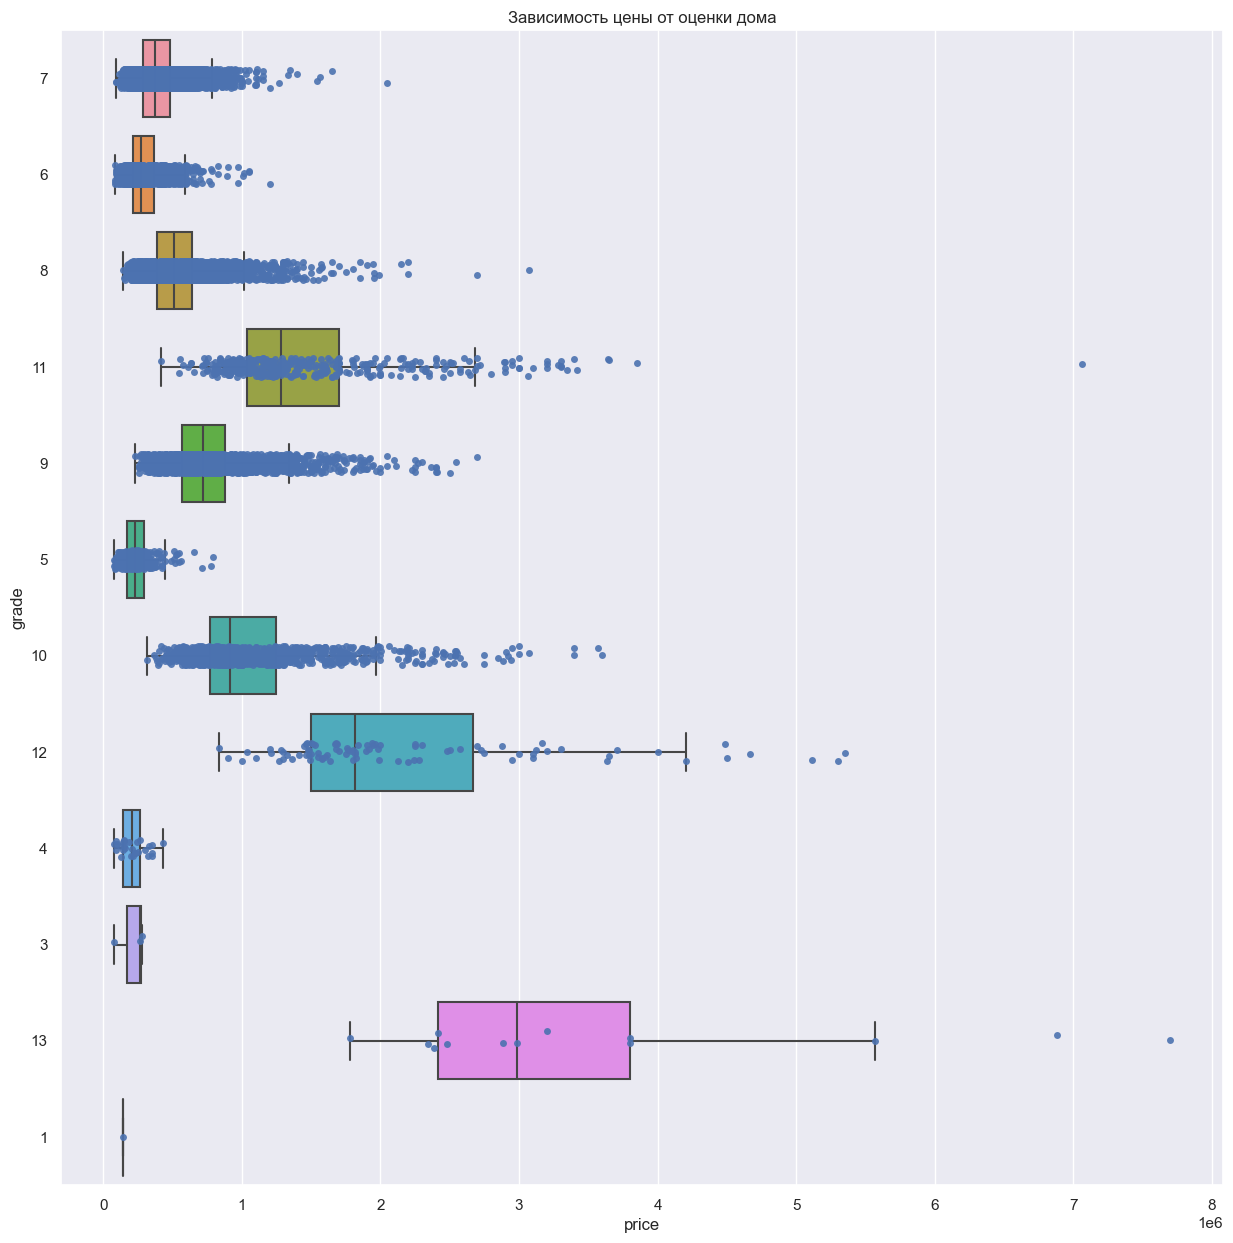

In [88]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5, showfliers=False)
sns.stripplot(x=df['price'],  y=df['grade'].astype('str'), marker="o", alpha=0.9, color="b")
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Зависимость цены от оценки дома');

Вывод:стоимость дома с увеличением его оценки возрастает, а количество  домов с высокой оценкой падает  и разброс цены домов с высокой оценкой увеличивается

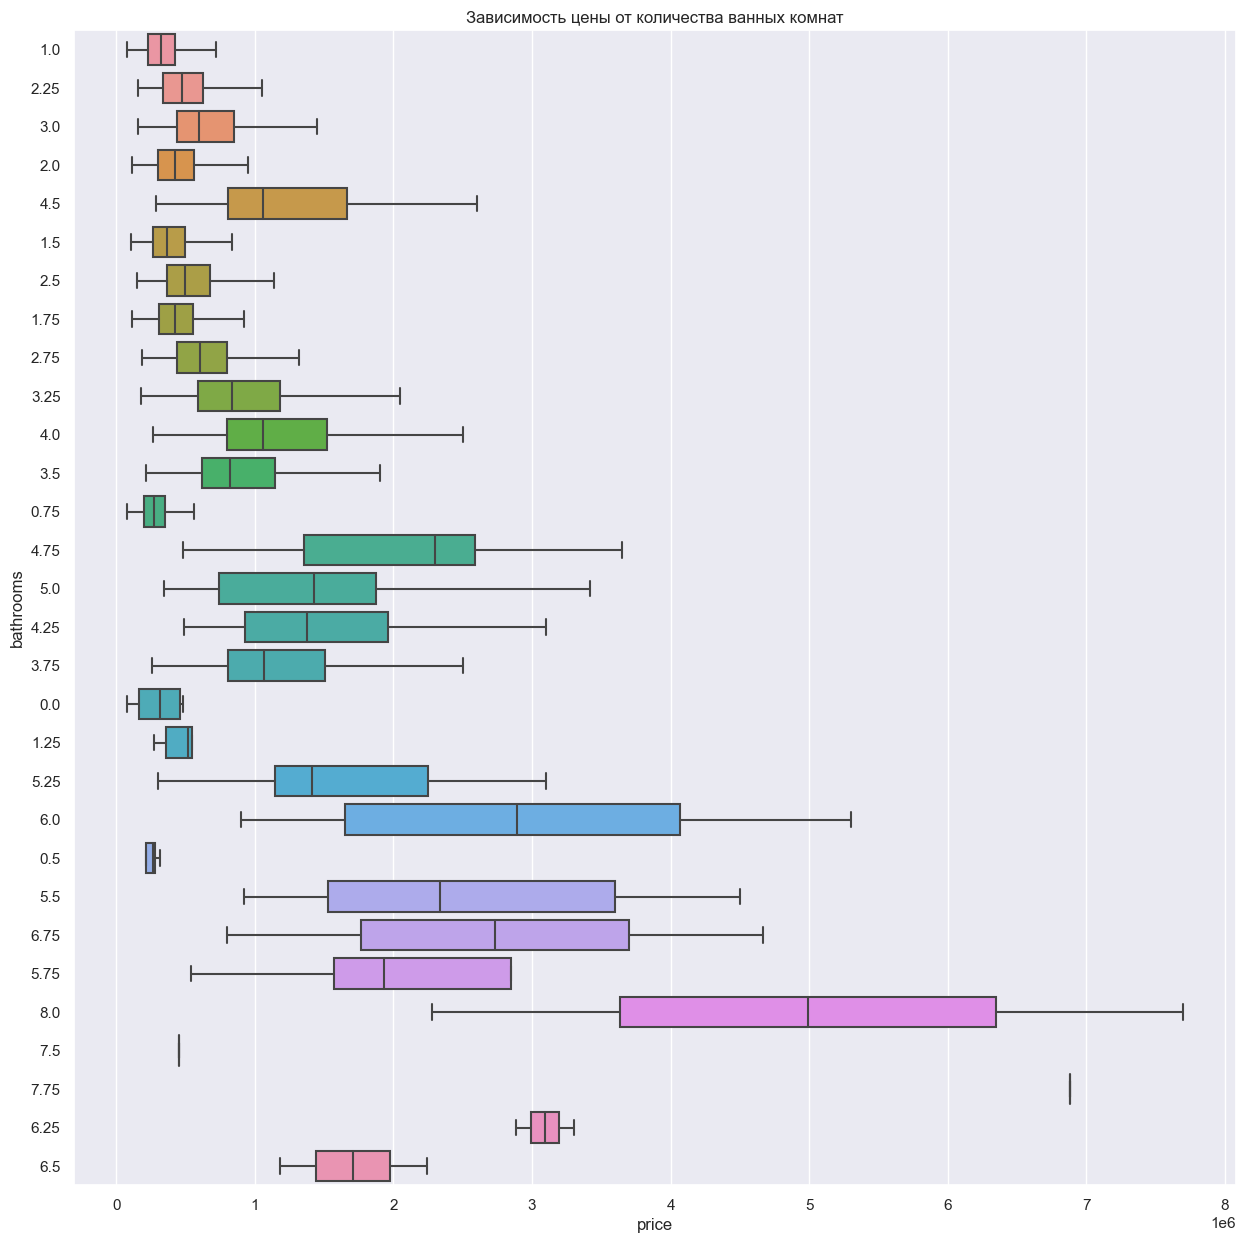

In [89]:
sns.boxplot(x=df['price'], y=df['bathrooms'].astype('str'), whis=1.5,showfliers=False);
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title('Зависимость цены от количества ванных комнат');

Из графика видно, что стоимость жилья возрастает при увеличении количества ванных комнат, и максимальную стоимость имеют дома с 8 ванными

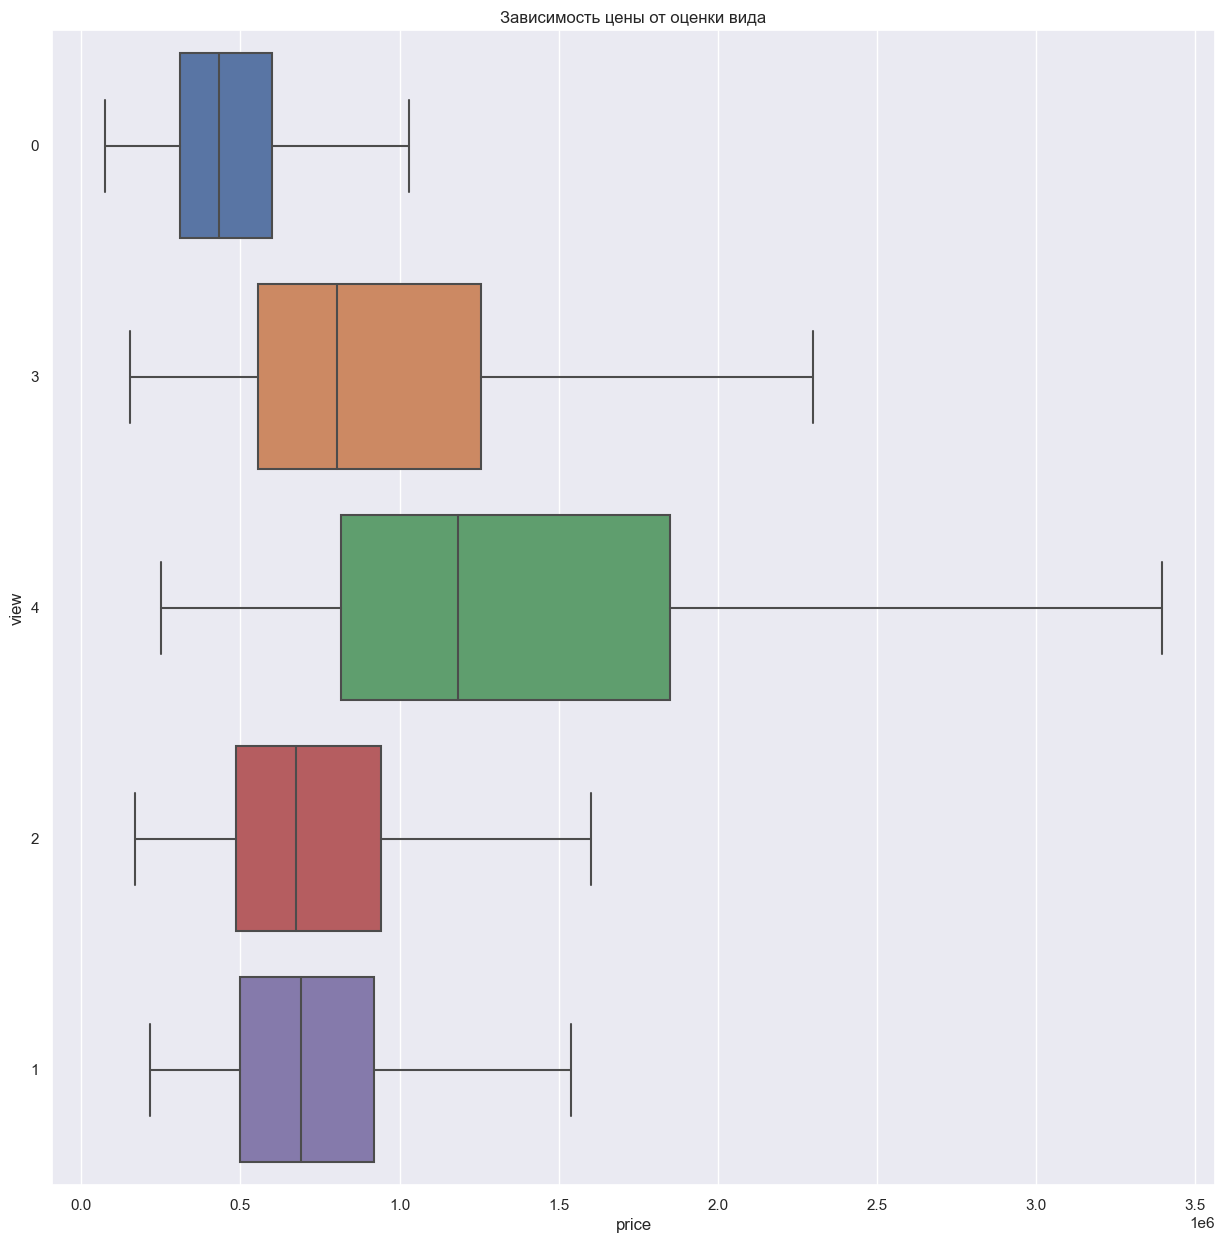

In [90]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5,showfliers=False);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Зависимость цены от оценки вида');

Из графика видно, что стоимость жилья возрастает при увеличении оценки вида, и максимальную стоимость имеют дома с оценкой 4

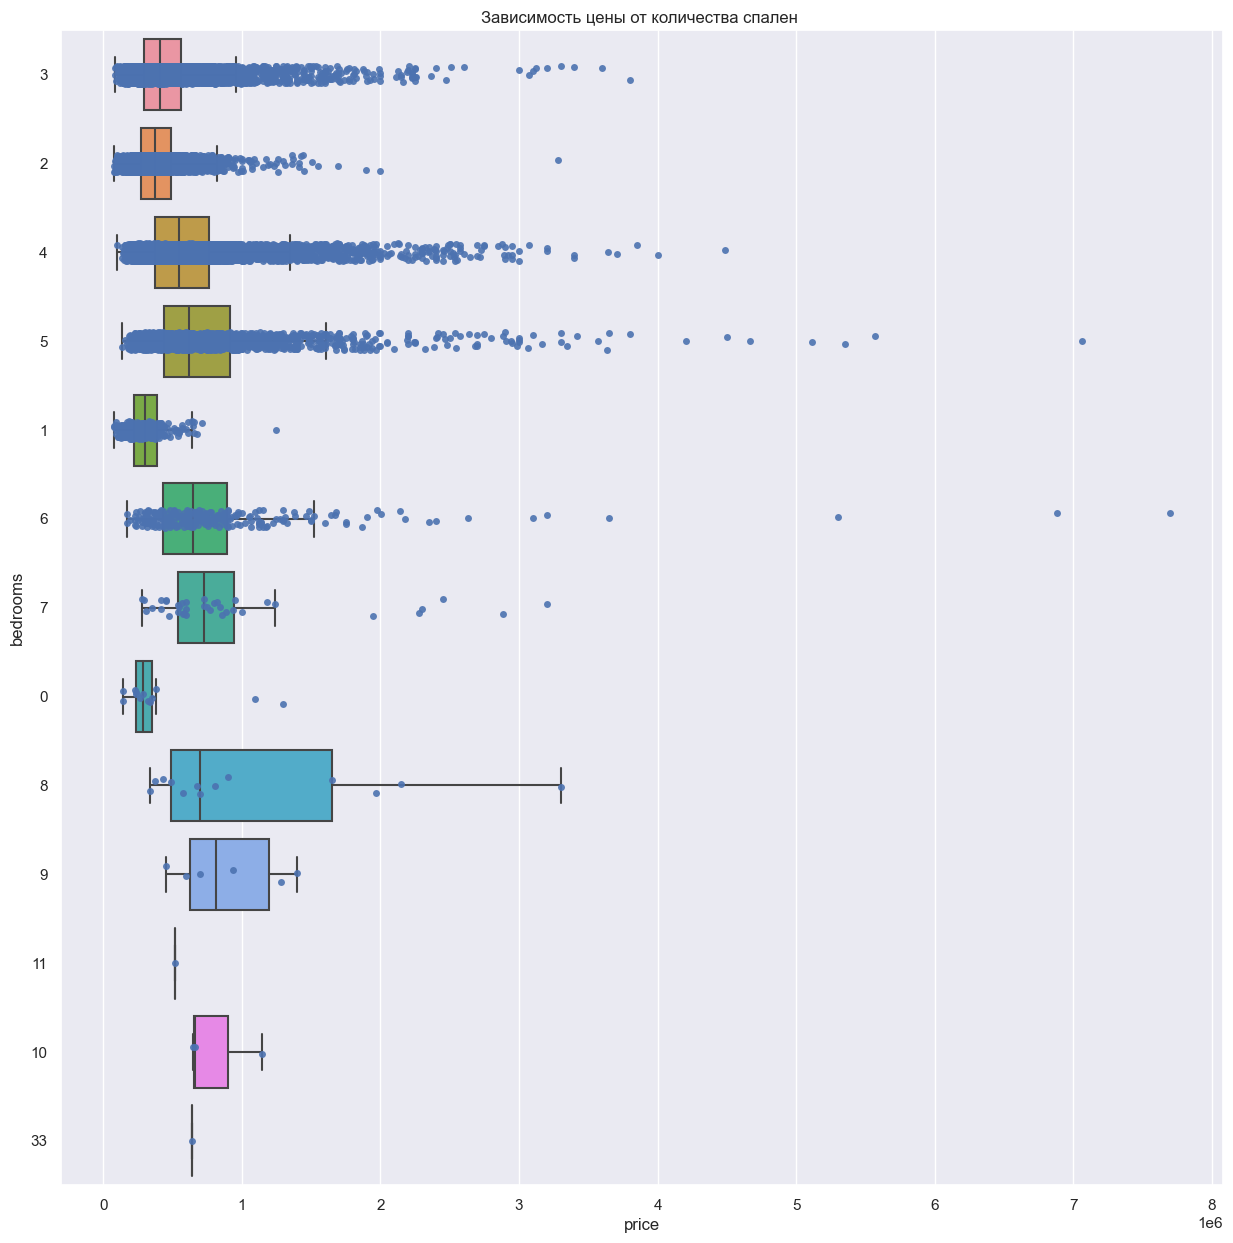

In [91]:
sns.boxplot(x=df['price'], y=df['bedrooms'].astype('str'), whis=1.5,showfliers=False)
sns.stripplot(x=df['price'],  y=df['bedrooms'].astype('str'), marker="o", alpha=0.9, color="b")
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('Зависимость цены от количества спален ');

Из графика видно,что большинство домов имеет не больше 6 спален, а стоимость домов с 9 спальнями имеют большую стоимость

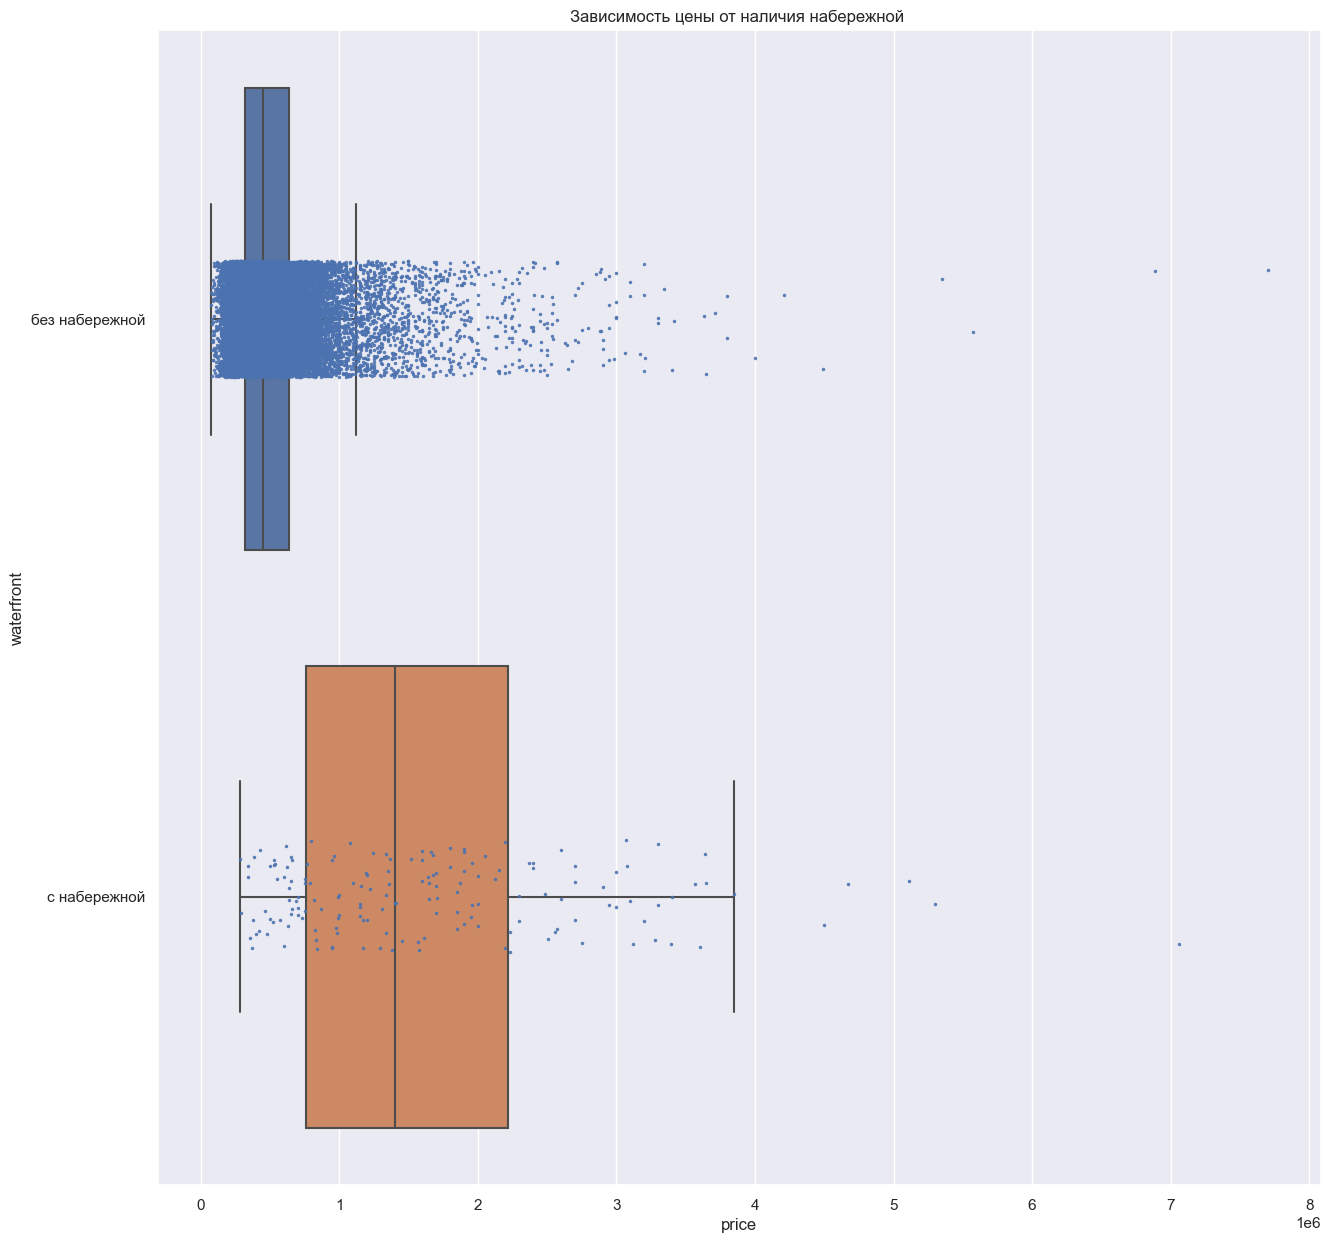

In [93]:
df["waterfront"]=df["waterfront"].apply(lambda x: "без набережной" if x==0 else "c набережной")
sns.boxplot(x=df['price'], y=df["waterfront"].astype('str'), whis=1.5,showfliers=False)
sns.stripplot(x=df['price'], y=df["waterfront"].astype('str'), marker=".", alpha=0.9, color="b")
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('Зависимость цены от наличия набережной ');

Домов с видом на набережную гораздо меньше, а стоимость таких домов в разы выше